<img src="houses.jpg" style="width:100%;height:400px"/>

# House Sale Prices Regression

These house types are designed for the US and Canada . All of these house properties are related to a price. Which property is more or less expensive?All of these correlations are good to observe which is what I am going to do in this project.Whatever it takes: far from a highway, far from a mall? What does really impact on a price or what is optimal price, or is there an outlier? A lot of questions and considerations. I am going to answer these question doing some research and statistics in this project. 

original version of the dataset https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import matplotlib
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Train and Test Data 
file =  '/Users/ceo/Desktop/'
testdf = pd.read_csv(file + 'test.csv', error_bad_lines=False) 
train = '/Users/ceo/Desktop/'
traindf=  pd.read_csv(train + 'train.csv', error_bad_lines=False) 
combined = pd.concat([testdf, traindf],sort=True)
#df4 = pd.read_csv(file2 + 'data_description.txt', error_bad_lines=False) 
#df5= df.melt(['text', 'Count'],['label','label_num'],'ham','spam')        #(frame=df, id_vars='label')
#df5 = df3.unstack()
#df6= df3.pivot_table(index='SalePrice',columns='Street', values='LotFrontage')
combined.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,NaN,2,1Fam,TA,No,468.0,144.0,...,WD,120,Pave,5,882.0,AllPub,140,1961,1961,2010
1,1329,0,0,NaN,3,1Fam,TA,No,923.0,0.0,...,WD,0,Pave,6,1329.0,AllPub,393,1958,1958,2010
2,928,701,0,NaN,3,1Fam,TA,No,791.0,0.0,...,WD,0,Pave,6,928.0,AllPub,212,1997,1998,2010
3,926,678,0,NaN,3,1Fam,TA,No,602.0,0.0,...,WD,0,Pave,7,926.0,AllPub,360,1998,1998,2010
4,1280,0,0,NaN,2,TwnhsE,TA,No,263.0,0.0,...,WD,144,Pave,5,1280.0,AllPub,0,1992,1992,2010
5,763,892,0,NaN,3,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,7,763.0,AllPub,157,1993,1994,2010
6,1187,0,0,NaN,3,1Fam,TA,No,935.0,0.0,...,WD,0,Pave,6,1168.0,AllPub,483,1992,2007,2010
7,789,676,0,NaN,3,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,7,789.0,AllPub,0,1998,1998,2010
8,1341,0,0,NaN,2,1Fam,TA,Gd,637.0,0.0,...,WD,0,Pave,5,1300.0,AllPub,192,1990,1990,2010
9,882,0,0,NaN,2,1Fam,TA,No,804.0,78.0,...,WD,0,Pave,4,882.0,AllPub,240,1970,1970,2010


### output

In [3]:
print(combined.columns)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [4]:
#exploring  what data types and if any missing values
combined = combined.reindex(sorted(combined.columns), axis=1) #sorting data alphabetically
print(combined.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       2919 non-null   int64  
 1   2ndFlrSF       2919 non-null   int64  
 2   3SsnPorch      2919 non-null   int64  
 3   Alley          198 non-null    object 
 4   BedroomAbvGr   2919 non-null   int64  
 5   BldgType       2919 non-null   object 
 6   BsmtCond       2837 non-null   object 
 7   BsmtExposure   2837 non-null   object 
 8   BsmtFinSF1     2918 non-null   float64
 9   BsmtFinSF2     2918 non-null   float64
 10  BsmtFinType1   2840 non-null   object 
 11  BsmtFinType2   2839 non-null   object 
 12  BsmtFullBath   2917 non-null   float64
 13  BsmtHalfBath   2917 non-null   float64
 14  BsmtQual       2838 non-null   object 
 15  BsmtUnfSF      2918 non-null   float64
 16  CentralAir     2919 non-null   object 
 17  Condition1     2919 non-null   object 
 18  Conditio

In [5]:
#printing first 5 rows
combined.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,NaN,2,1Fam,TA,No,468.0,144.0,...,WD,120,Pave,5,882.0,AllPub,140,1961,1961,2010
1,1329,0,0,NaN,3,1Fam,TA,No,923.0,0.0,...,WD,0,Pave,6,1329.0,AllPub,393,1958,1958,2010
2,928,701,0,NaN,3,1Fam,TA,No,791.0,0.0,...,WD,0,Pave,6,928.0,AllPub,212,1997,1998,2010
3,926,678,0,NaN,3,1Fam,TA,No,602.0,0.0,...,WD,0,Pave,7,926.0,AllPub,360,1998,1998,2010
4,1280,0,0,NaN,2,TwnhsE,TA,No,263.0,0.0,...,WD,144,Pave,5,1280.0,AllPub,0,1992,1992,2010


In [6]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 2919)
#display(combined.isnull().sum())

In [7]:
15421/210168

0.07337463362643219

## Exploratory data analysis

In [33]:
combined['BsmtCond'].fillna(combined['BsmtCond'].mode()[0], inplace=True)  # filling NaN or missing value
combined['BsmtQual'].fillna(combined['BsmtQual'].mode()[0], inplace=True)  # filling NaN or missing value
combined['Exterior1st'].fillna(combined['Exterior1st'].mode()[0], inplace=True)  # filling NaN or missing value
combined['Exterior2nd'].fillna(combined['Exterior2nd'].mode()[0], inplace=True)  # filling NaN or missing value
combined['FireplaceQu'].fillna(combined['FireplaceQu'].mode()[0], inplace=True)  # filling NaN or missing value
combined['Functional'].fillna(combined['Functional'].mode()[0], inplace=True)  # filling NaN or missing value
combined['GarageArea'].fillna(combined['GarageArea'].mode()[0], inplace=True)  # filling NaN or missing value
combined['GarageCond'].fillna(combined['GarageCond'].mode()[0], inplace=True)  # filling NaN or missing value
combined['GarageFinish'].fillna(combined['GarageFinish'].mode()[0], inplace=True)  # filling NaN or missing value
combined['GarageQual'].fillna(combined['GarageQual'].mode()[0], inplace=True)  # filling NaN or missing value
combined['GarageType'].fillna(combined['GarageType'].mode()[0], inplace=True)  # filling NaN or missing value
combined['KitchenQual'].fillna(combined['KitchenQual'].mode()[0], inplace=True)  # filling NaN or missing value
combined['MSZoning'].fillna(combined['MSZoning'].mode()[0], inplace=True)  # filling NaN or missing value
combined['MasVnrType'].fillna(combined['MasVnrType'].mode()[0], inplace=True)  # filling NaN or missing value
combined['SaleType'].fillna(combined['SaleType'].mode()[0], inplace=True)  # filling NaN or missing value
combined['Utilities'].fillna(combined['Utilities'].mode()[0], inplace=True)  # filling NaN or missing value

#df3.fillna(value="None",inpalce = True)
combined.SalePrice.fillna(combined.SalePrice.median(),inplace=True)
combined.BsmtFinSF1.fillna(combined.BsmtFinSF1.median(), inplace=True)
combined.BsmtFinSF2.fillna(combined.BsmtFinSF2.median(),inplace=True)
combined.BsmtFullBath.fillna(combined.BsmtFullBath.median(),inplace=True)
combined.BsmtHalfBath.fillna(combined.BsmtHalfBath.median(),inplace=True)
combined.BsmtUnfSF.fillna(combined.BsmtUnfSF.median(),inplace=True)
combined.GarageArea.fillna(combined.GarageArea.median(),inplace=True)
combined. GarageCars.fillna(combined.GarageCars.median(),inplace=True)
combined.GarageYrBlt.fillna(combined.GarageYrBlt.median(),inplace=True)
combined.LotFrontage.fillna(combined.LotFrontage.median(),inplace=True)
combined.MasVnrArea.fillna(combined.MasVnrArea.median(),inplace=True)
combined. TotalBsmtSF.fillna(combined.TotalBsmtSF.median(),inplace=True)

 # I will drop  these featureas 

#Alley           
#Fence          
#PoolQC"""

In [9]:
print(combined['BsmtCond']) # checking if missing values are filled
print(combined['SalePrice']) # checking if missing values are filled


0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    TA
1459    TA
Name: BsmtCond, Length: 2919, dtype: object
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 2919, dtype: float64


In [25]:
combined.drop(['Alley'], axis=1, inplace=True)
combined.drop(['PoolQC'], axis=1, inplace=True)
combined.drop(['MiscFeature'], axis=1, inplace=True)
combined.drop(['Fence'], axis=1, inplace=True)

KeyError: "['PoolQC'] not found in axis"

In [34]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       2919 non-null   int64  
 1   2ndFlrSF       2919 non-null   int64  
 2   3SsnPorch      2919 non-null   int64  
 3   BedroomAbvGr   2919 non-null   int64  
 4   BldgType       2919 non-null   object 
 5   BsmtCond       2919 non-null   object 
 6   BsmtExposure   2837 non-null   object 
 7   BsmtFinSF1     2919 non-null   float64
 8   BsmtFinSF2     2919 non-null   float64
 9   BsmtFinType1   2840 non-null   object 
 10  BsmtFinType2   2839 non-null   object 
 11  BsmtFullBath   2919 non-null   float64
 12  BsmtHalfBath   2919 non-null   float64
 13  BsmtQual       2919 non-null   object 
 14  BsmtUnfSF      2919 non-null   float64
 15  CentralAir     2919 non-null   object 
 16  Condition1     2919 non-null   object 
 17  Condition2     2919 non-null   object 
 18  Electric

In [12]:
print(combined['LotFrontage'].value_counts(dropna=False))
print(combined['LotArea'].value_counts(dropna=False))

NaN      486
60.0     276
80.0     137
70.0     133
50.0     117
        ... 
22.0       1
136.0      1
111.0      1
28.0       1
141.0      1
Name: LotFrontage, Length: 129, dtype: int64
9600     44
7200     43
6000     34
9000     29
10800    25
         ..
8789      1
12887     1
12891     1
10846     1
12292     1
Name: LotArea, Length: 1951, dtype: int64


#  Data Wrangling  techniques 

In [13]:
# checking number of columns and rows
print(combined.shape) 

(2919, 78)


In [14]:
# checking for duplicates
combined.duplicated() 

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 2919, dtype: bool

In [15]:
# testing with assert statement if I have null values
assert pd.notnull(combined).all().all() 

AssertionError: 

# Detecting outliers

In [16]:
#Finding quartiles of SalePrice
combined.SalePrice.quantile([0.25,0.5,0.75])

0.25    129975.0
0.50    163000.0
0.75    214000.0
Name: SalePrice, dtype: float64

In [17]:
#IQR = 75th percentile-25th percentile
IQR = 214000.0-129975.0

In [18]:
1.5*IQR

126037.5

In [19]:
#Any number less than this is a suspected outlier.
163000.0-126037.5

36962.5

In [20]:
#Any number less than this is a suspected outlier.
163000.0+126037.5

289037.5

# The boundaries are found so I can remove the data that is out of these boundaries.

In [21]:
outlier_great = combined[(combined['SalePrice'] < 36962.5) ]
outlier_great.fillna(method='bfill') 
#df4 = combined[combined['SalePrice'] > 36962.5] 
#df4['SalePrice']
outlier_great

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
495,720,0,0,NaN,2,1Fam,TA,No,495.0,0.0,...,WD,0,Pave,4,720.0,AllPub,0,1920,1950,2009
916,480,0,0,NaN,1,1Fam,TA,Av,50.0,0.0,...,WD,0,Pave,4,480.0,AllPub,0,1949,1950,2006


In [22]:
outlier_less = combined[(combined['SalePrice'] > 289037.5 ) ]
outlier_less.fillna(method='bfill') 
#df4 = combined[combined['SalePrice'] < 289037.5 ] 
#print(df4['SalePrice'])
outlier_less

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
11,1182,1142,0,NaN,4,1Fam,TA,No,998.0,0.0,...,New,0,Pave,11,1175.0,AllPub,147,2005,2006,2006
20,1158,1218,0,NaN,4,1Fam,TA,Av,0.0,0.0,...,New,0,Pave,9,1158.0,AllPub,240,2005,2006,2006
27,1704,0,0,NaN,3,1Fam,TA,No,1218.0,0.0,...,WD,0,Pave,7,1704.0,AllPub,0,2007,2008,2010
35,1132,1320,0,NaN,4,1Fam,TA,Av,0.0,0.0,...,WD,0,Pave,9,1117.0,AllPub,113,2004,2005,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,2633,0,0,NaN,2,1Fam,TA,Gd,1282.0,0.0,...,WD,0,Pave,8,2633.0,AllPub,314,2001,2002,2007
1388,1746,0,0,NaN,3,1Fam,TA,Gd,1320.0,0.0,...,WD,0,Pave,7,1746.0,AllPub,201,2006,2007,2009
1417,1310,1140,0,NaN,3,1Fam,TA,Mn,781.0,0.0,...,WD,0,Pave,7,1284.0,AllPub,0,1998,1998,2009
1437,1932,0,304,NaN,2,1Fam,TA,Av,1336.0,0.0,...,New,0,Pave,7,1932.0,AllPub,0,2008,2008,2008


# Statistical Approach

In [ ]:
combined.describe().T

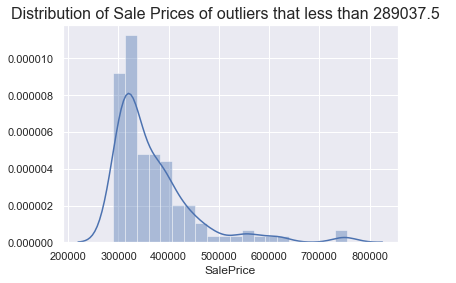

In [23]:
sns.set(color_codes=True)

sns.distplot(outlier_less['SalePrice'],bins=20).set_title('Distribution of Sale Prices of outliers that less than 289037.5  ',fontsize=16);

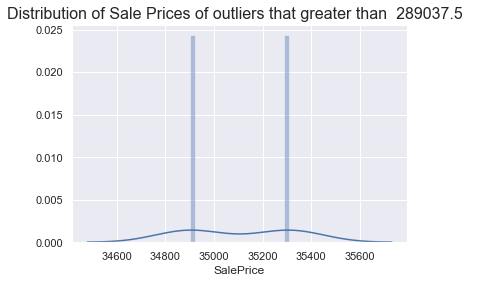

In [24]:
sns.set(color_codes=True)

sns.distplot(outlier_great['SalePrice'],bins=20).set_title('Distribution of Sale Prices of outliers that greater than  289037.5  ',fontsize=16);